# <b><span style='color:#0492fd'>|</span>Варіант 88 (в потоці)</b>

## <b><span style='color:#F1C40F'>|</span> Підготовка даних</b>

In [1]:
import pandas as pd

locations = pd.read_csv("locations.csv", low_memory=False)
locations

,id,type_ids,lat,lng,unverified,description,season_start,season_stop,no_season,author,address,created_at,updated_at,access,import_link,original_ids,hidden
0,22,3,37.409849,-122.137529,False,Nice big tart oranges,December,NaN,False,Caleb,NaN,2013-01-31 21:26:20 UTC,2016-12-03 23:57:20 UTC,Private but overhanging,NaN,NaN,False
1,23,8,37.412087,-122.140182,False,"Huge trees, many of them, all along the bike p...",NaN,NaN,False,Caleb,NaN,2013-01-31 21:27:18 UTC,2016-12-03 23:48:04 UTC,Public,NaN,NaN,False
2,24,4,37.412043,-122.139700,False,NaN,NaN,NaN,False,caleb,NaN,2013-01-31 21:54:00 UTC,2016-12-03 23:42:51 UTC,Private but overhanging,NaN,NaN,False
3,25,3,37.411562,-122.139288,False,NaN,NaN,NaN,False,caleb,NaN,2013-01-31 21:55:50 UTC,2016-12-03 23:52:30 UTC,NaN,NaN,NaN,False
4,26,4,37.411252,-122.138862,False,NaN,NaN,NaN,False,caleb,NaN,2013-01-31 21:56:50 UTC,2016-12-03 23:38:36 UTC,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501500,1830447,418,27.793571,-82.607624,False,No fruit but still has old panicles\nWas not l...,NaN,NaN,NaN,Warren,"1834 Brightwaters Blvd NE, St. Petersburg, FL ...",2023-08-01 16:57:03 UTC,2023-08-01 16:57:03 UTC,Private but overhanging,NaN,NaN,False
1501501,1830448,3486,53.814178,-3.017772,False,Probably will get eaten by the squirrels and n...,NaN,NaN,NaN,Imo,"Model Village, Blackpool FY3 9RB, UK",2023-08-01 17:34:29 UTC,2023-08-01 17:34:29 UTC,Public,NaN,NaN,False
1501502,1830449,56,20.996147,-89.693259,False,Un nopal grande con tunas. 1/8/22 todavía poca...,NaN,NaN,NaN,Minty,"A 97314, Calle 64 781, Cd Caucel, 97314 Mérida...",2023-08-01 23:57:37 UTC,2023-08-01 23:57:37 UTC,Public,NaN,NaN,False
1501503,1830450,18,28.068899,-82.445372,False,"Vigorous tree, good fruit. Is in the parking l...",NaN,NaN,False,NaN,"1321 E Fletcher Ave, Tampa, FL 33612, USA",2023-08-02 01:12:47 UTC,2023-08-02 01:12:47 UTC,NaN,NaN,NaN,False


## <b><span style='color:#F1C40F'>|</span> Перегянемо дані</b>

### <b><span style='color:#F1C40F'>|</span> Огляд структури даних</b>

In [2]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501505 entries, 0 to 1501504
Data columns (total 17 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   id            1501505 non-null  int64  
 1   type_ids      1500328 non-null  object 
 2   lat           1501505 non-null  float64
 3   lng           1501505 non-null  float64
 4   unverified    1501505 non-null  bool   
 5   description   1475599 non-null  object 
 6   season_start  17672 non-null    object 
 7   season_stop   15967 non-null    object 
 8   no_season     41795 non-null    object 
 9   author        1478529 non-null  object 
 10  address       109369 non-null   object 
 11  created_at    1501505 non-null  object 
 12  updated_at    1501505 non-null  object 
 13  access        359864 non-null   object 
 14  import_link   1442119 non-null  object 
 15  original_ids  647819 non-null   object 
 16  hidden        1501505 non-null  bool   
dtypes: bool(2), float64(2), int

### <b><span style='color:#F1C40F'>|</span> Перевірка пропущених значень</b>

In [3]:
locations.isnull().sum()

id                    0
type_ids           1177
lat                   0
lng                   0
unverified            0
description       25906
season_start    1483833
season_stop     1485538
no_season       1459710
author            22976
address         1392136
created_at            0
updated_at            0
access          1141641
import_link       59386
original_ids     853686
hidden                0
dtype: int64

### <b><span style='color:#F1C40F'>|</span> Перевірка чи є дублікати чи ні</b>

In [4]:
if locations[locations.duplicated()].empty:
    print("Дублікати відсутні")
else:
    print(f"Знайдено {len(duplicates)} дублікатів:")
    print(duplicates)

Дублікати відсутні


## <b><span style='color:#F1C40F'>|</span> Візуалізація даних:</b>

### <b><span style='color:#F1C40F'>|</span> Візуалізація кількості перевірених і неперевірених локацій:</b>

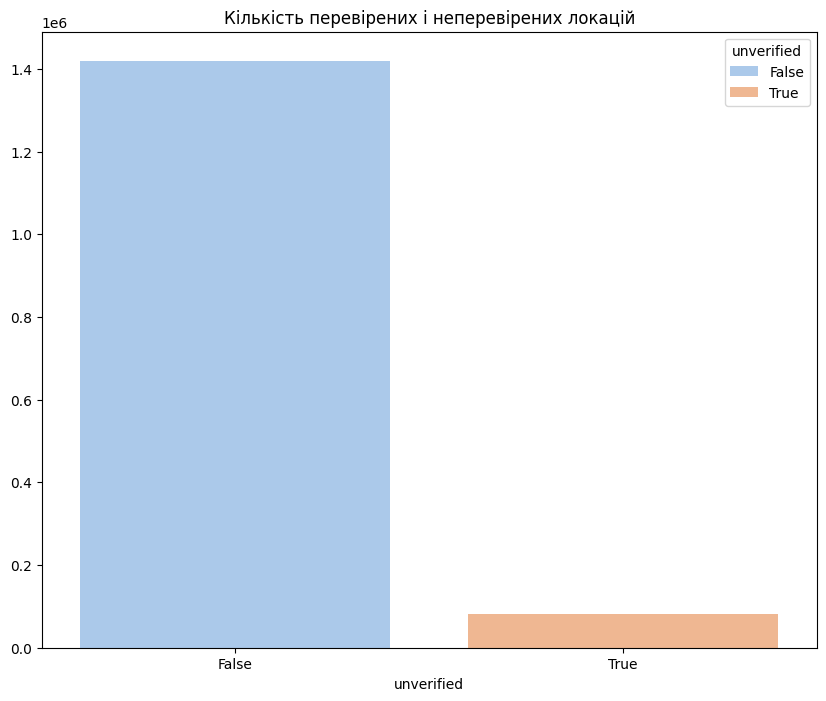

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

unverified_counts = locations['unverified'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=unverified_counts.index, y=unverified_counts.values, palette='pastel', hue=unverified_counts.index)
plt.title('Кількість перевірених i неперевірених локацій')
plt.show()

### <b><span style='color:#F1C40F'>|</span> Візуалізація географічного розподілу локацій:</b>

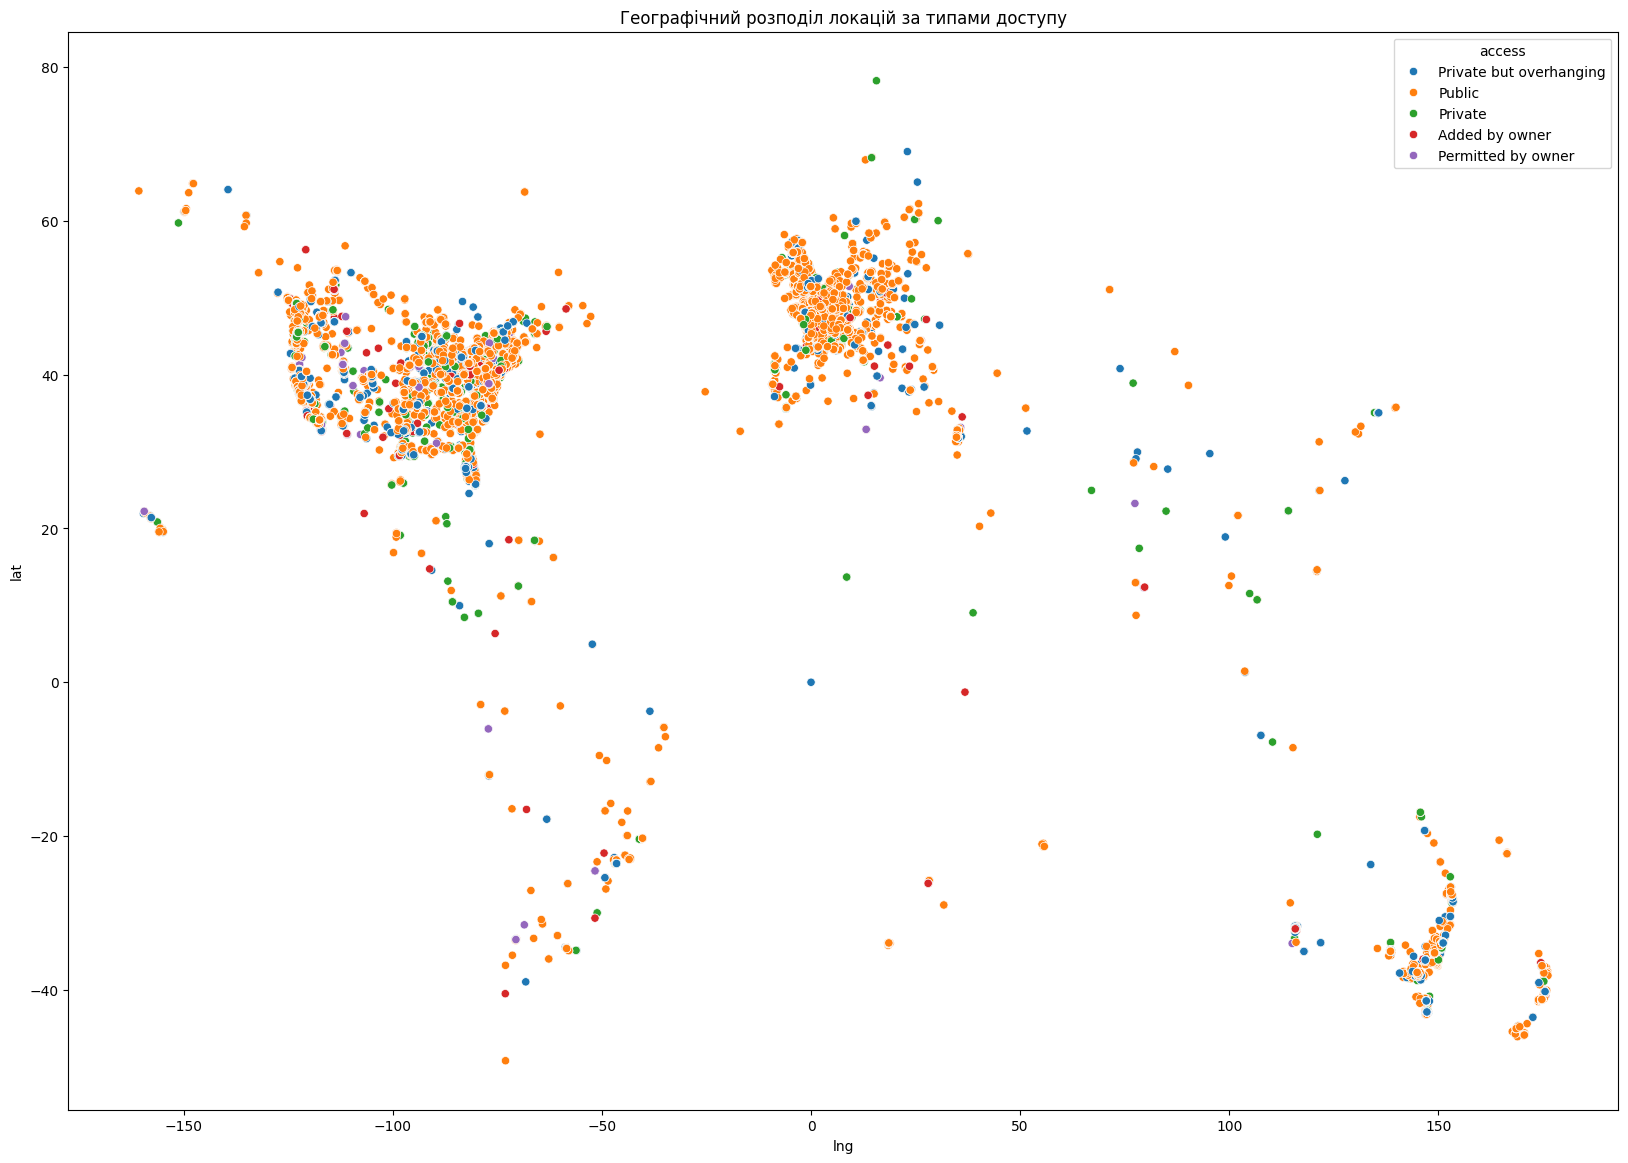

In [6]:
plt.figure(figsize=(20, 14))
sns.scatterplot(data=locations, x='lng', y='lat', hue='access')
plt.title('Географічний розподіл локацій за типами доступу')
plt.show()

### <b><span style='color:#F1C40F'>|</span> Візуалізація сезонності:</b>

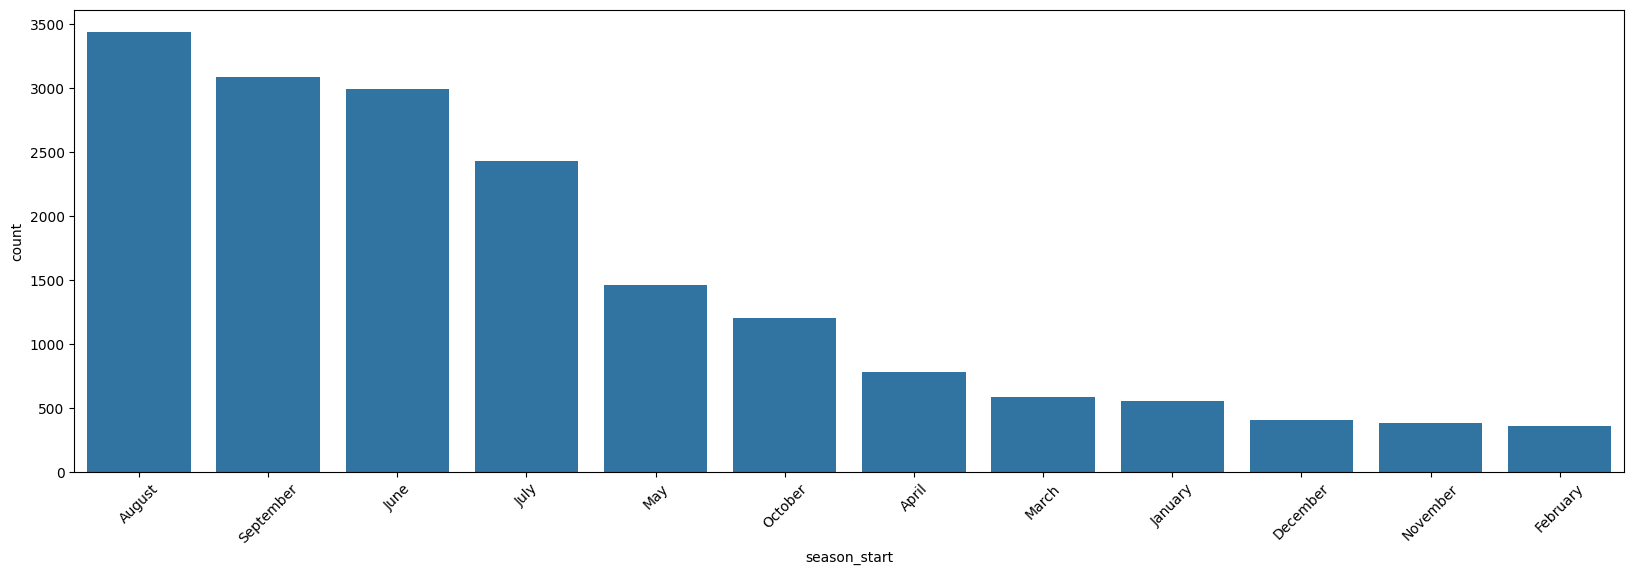

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

season_start_counts = locations['season_start'].value_counts()
season_stop_counts = locations['season_stop'].value_counts()

plt.figure(figsize=(20, 6))
season_data = locations[locations['season_start'] != 'Unknown']
sns.countplot(data=season_data, x='season_start', order=season_data['season_start'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

### <b><span style='color:#F1C40F'>|</span> Побудова графіка кількості наявних і відсутніх описів:</b>

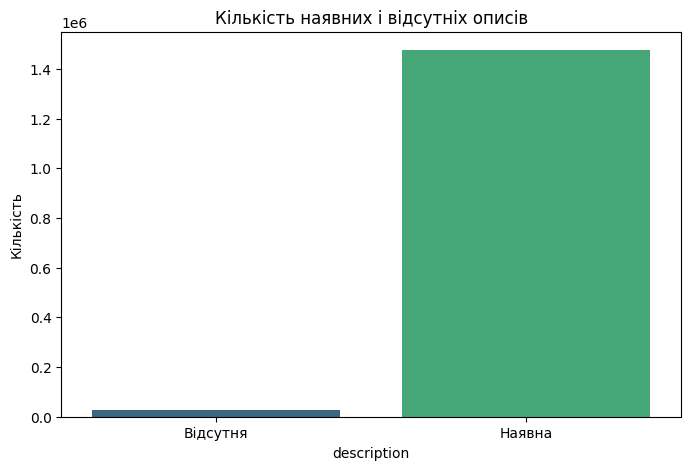

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x=locations['description'].notnull(), palette='viridis', hue=locations['description'].notnull(), legend=False)
plt.title('Кількість наявних i відсутніх описів')
plt.xticks([0, 1], ['Відсутня', 'Наявна'])
plt.ylabel('Кількість')
plt.show()

### <b><span style='color:#F1C40F'>|</span> Гістограма для типів:</b>

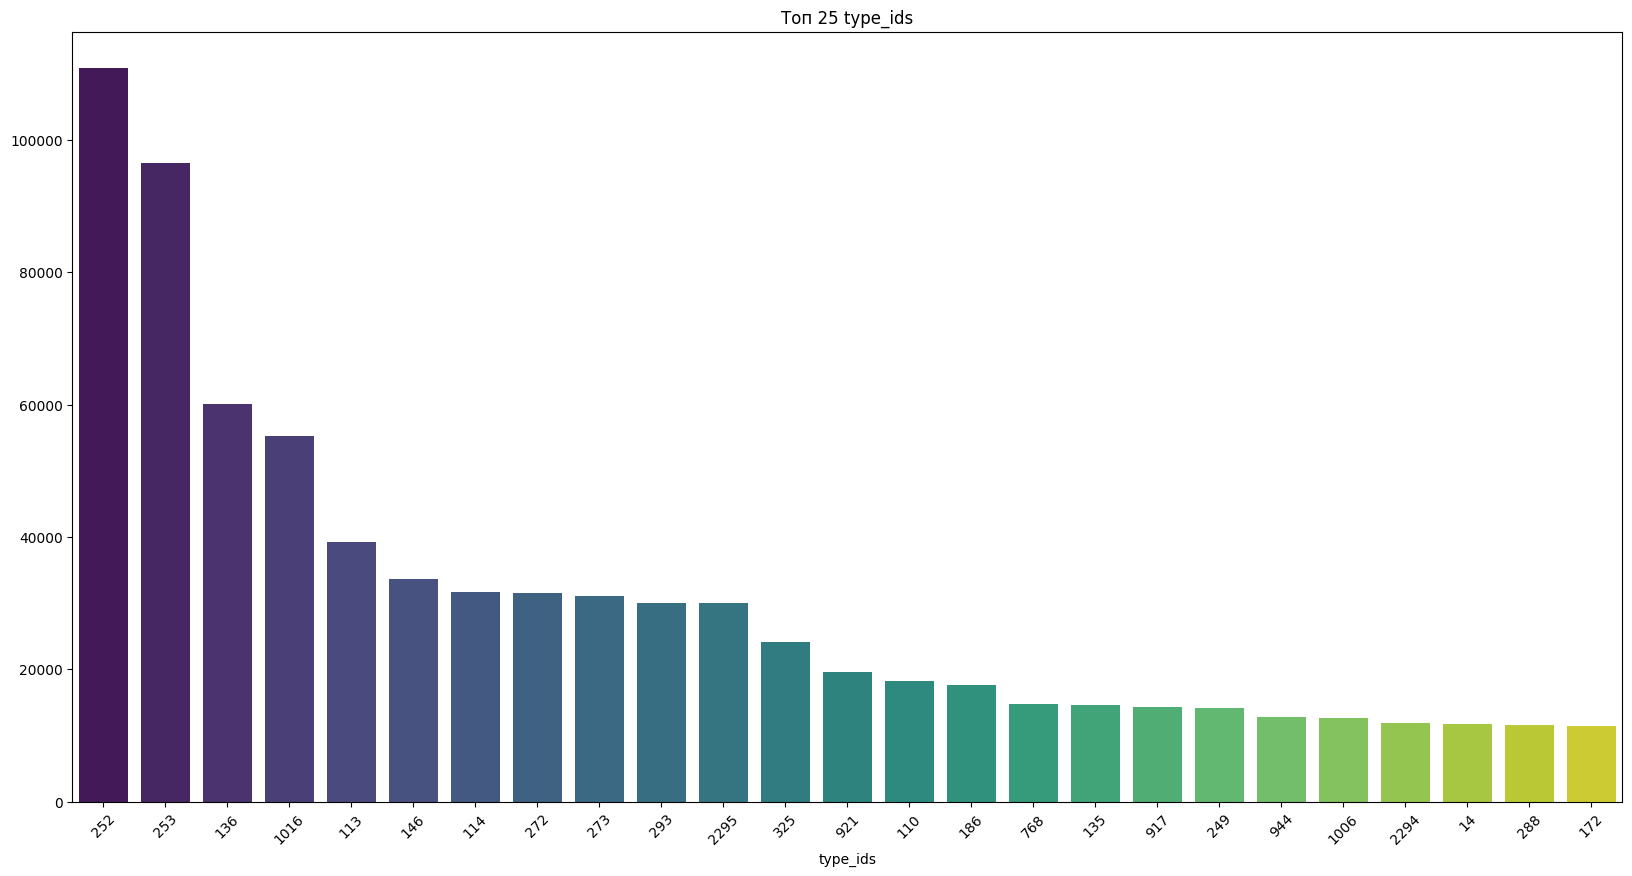

In [9]:
type_counts = locations['type_ids'].value_counts().head(25)

plt.figure(figsize=(20, 10))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis', hue=type_counts.index, dodge=False)
plt.title('Топ 25 type_ids')
plt.xticks(rotation=45)
plt.show()

### <b><span style='color:#F1C40F'>|</span> Візуалізація типів доступу:</b>

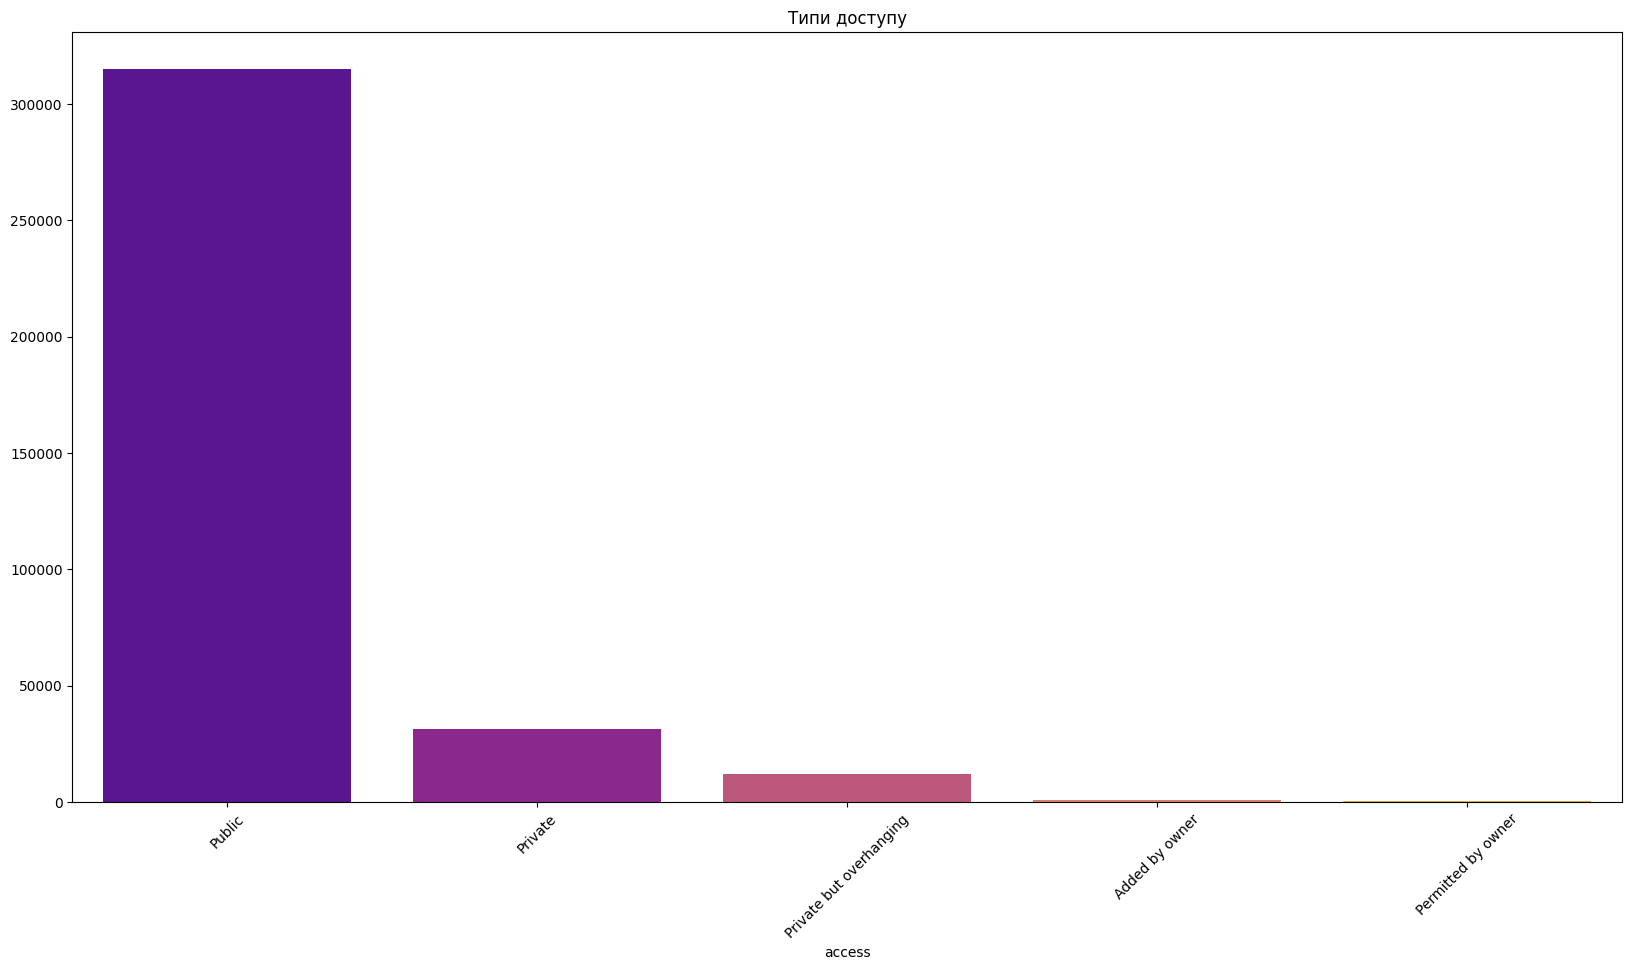

In [10]:
access_counts = locations['access'].value_counts()

plt.figure(figsize=(20, 10))
sns.barplot(x=access_counts.index, y=access_counts.values, palette='plasma', hue=access_counts.index, dodge=False)
plt.title('Типи доступу')
plt.xticks(rotation=45)
plt.show()